In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train=pd.read_csv("bike.csv")
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train["datetime"]=pd.to_datetime(train["datetime"])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
datetime=train["datetime"]
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [9]:
train["year"]=datetime.dt.year
train["year"].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [10]:
train["month"]=datetime.dt.month
train["month"].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [11]:
train["day"]=datetime.dt.day
train["day"].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [12]:
train["hour"]=datetime.dt.hour
train["hour"].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [13]:
train["minute"]=datetime.dt.minute
train["minute"].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [14]:
train["second"]=datetime.dt.second
train["second"].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: int64

In [15]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

<Axes: xlabel='year', ylabel='count'>

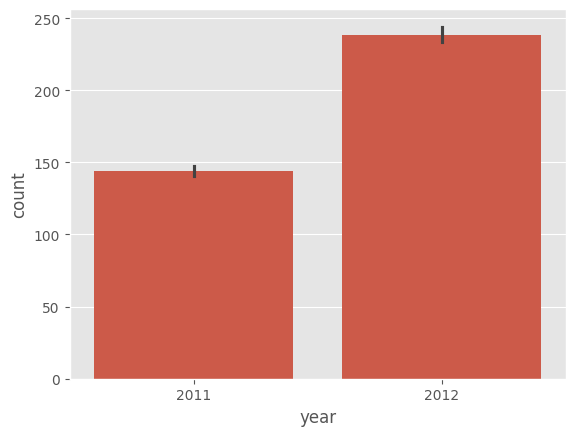

In [16]:
sns.barplot(data=train,x="year",y="count")

<Axes: xlabel='month', ylabel='count'>

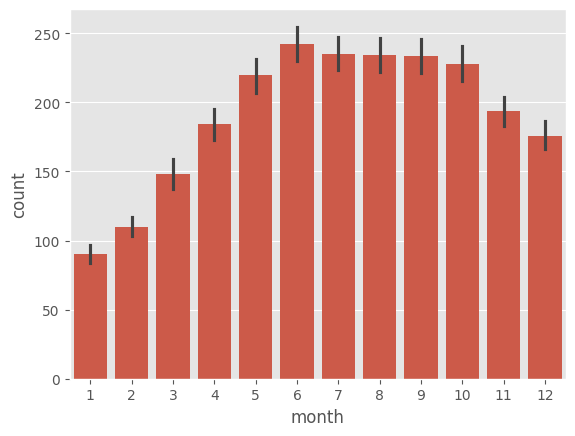

In [17]:
sns.barplot(data=train,x="month",y="count")

<Axes: xlabel='day', ylabel='count'>

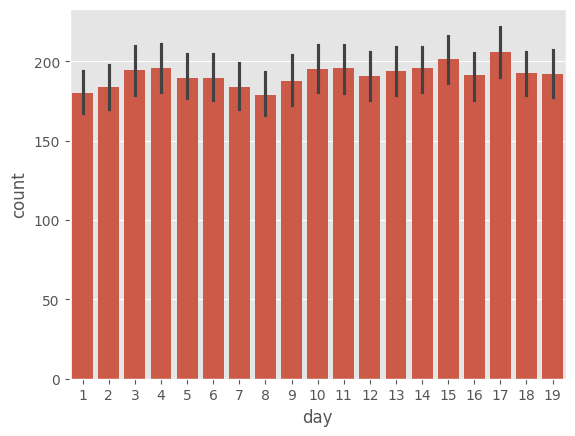

In [18]:
sns.barplot(data=train,x="day",y="count")

<Axes: xlabel='hour', ylabel='count'>

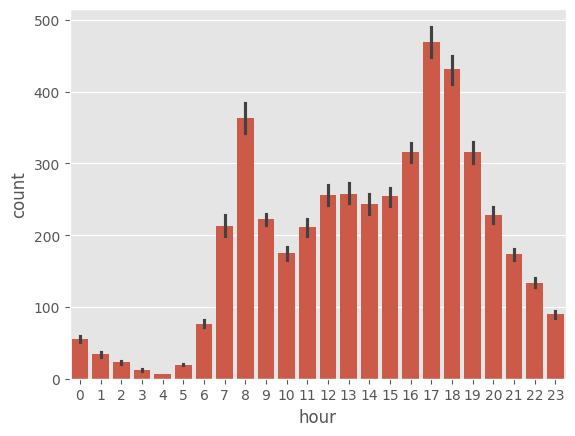

In [19]:
sns.barplot(data=train,x="hour",y="count")

<Axes: xlabel='minute', ylabel='count'>

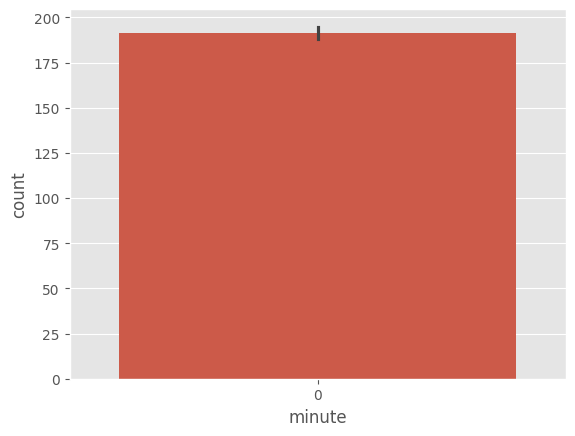

In [20]:
sns.barplot(data=train,x="minute",y="count")

<Axes: xlabel='second', ylabel='count'>

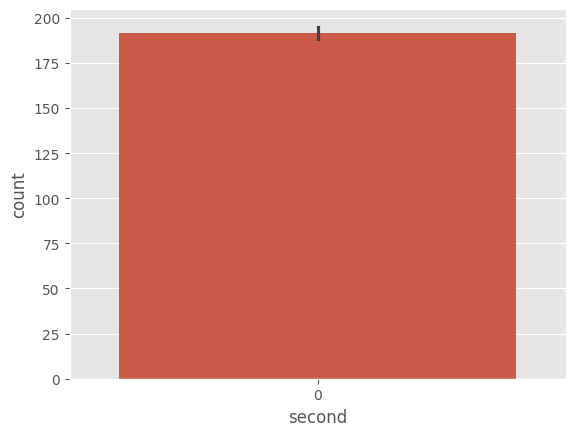

In [21]:
sns.barplot(data=train,x="second",y="count")

In [23]:
train["dayofweek"]=datetime.dt.dayofweek
train["dayofweek"].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

In [24]:
plt.figure(figsize=(30,10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Axes: xlabel='hour', ylabel='count'>

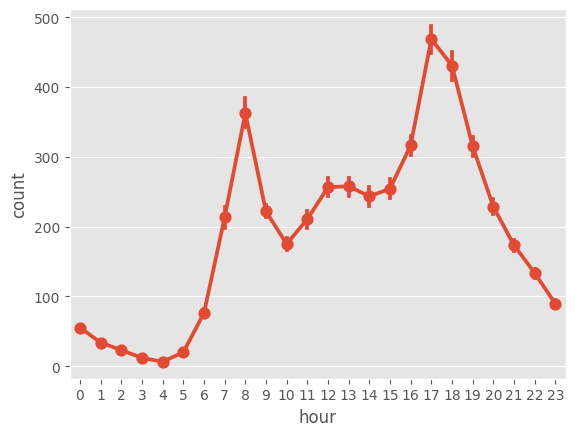

In [27]:
sns.pointplot(data=train,x="hour",y="count")

<Axes: xlabel='hour', ylabel='count'>

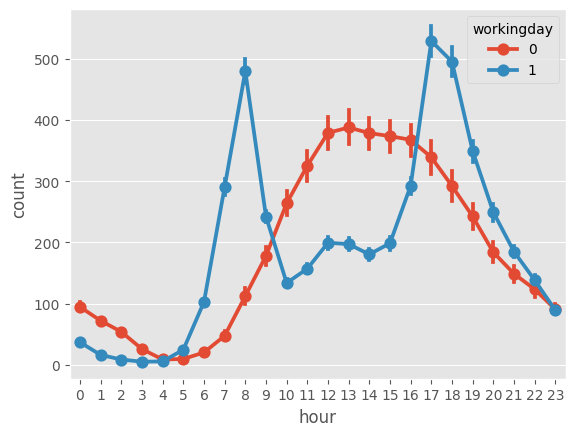

In [28]:
sns.pointplot(data=train,x="hour",y="count",hue="workingday")

<Axes: xlabel='hour', ylabel='count'>

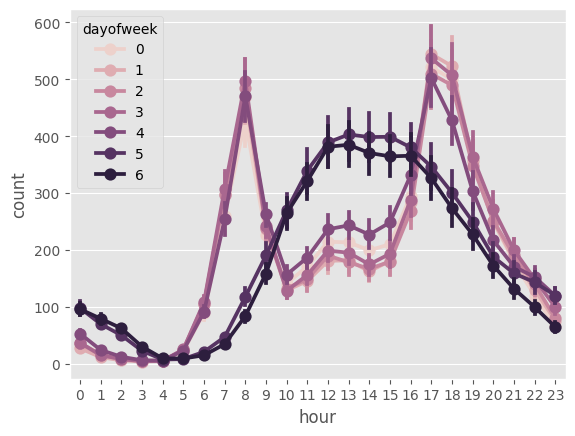

In [29]:
sns.pointplot(data=train,x="hour",y="count",hue="dayofweek")

<Axes: xlabel='hour', ylabel='count'>

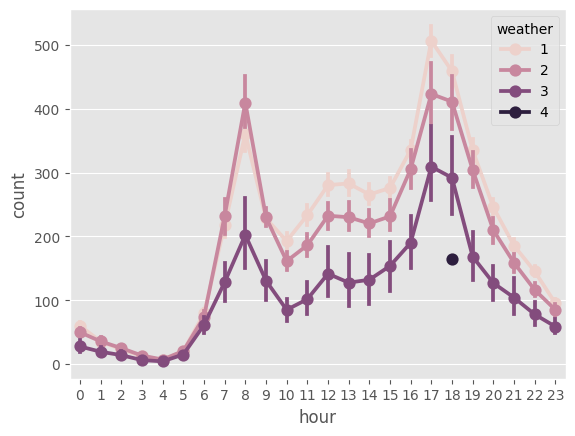

In [30]:
sns.pointplot(data=train,x="hour",y="count",hue="weather")

<Axes: xlabel='hour', ylabel='count'>

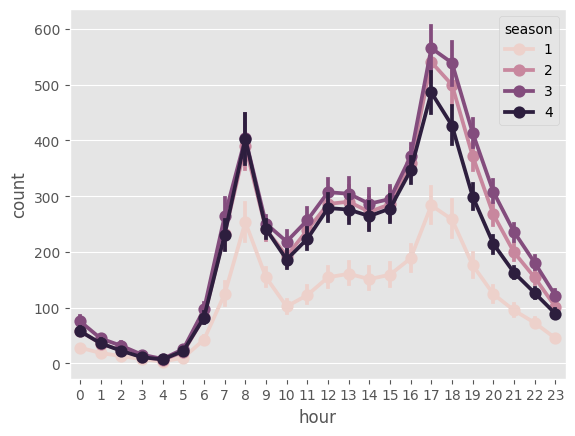

In [31]:
sns.pointplot(data=train,x="hour",y="count",hue="season")

<Axes: xlabel='windspeed', ylabel='count'>

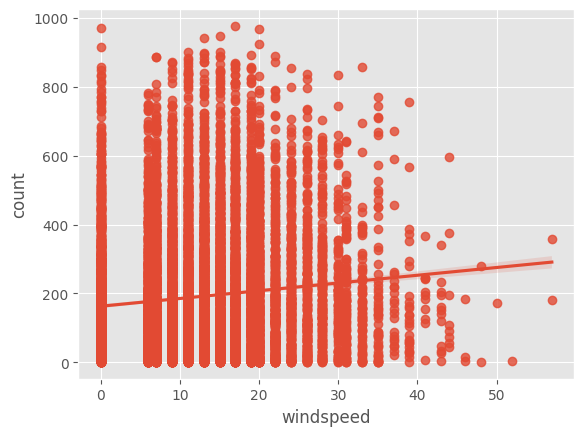

In [32]:
sns.regplot(x="windspeed",y="count",data=train)

C:\Users\User\AppData\Local\Temp\ipykernel_5904\3457338035.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap="RdBu_r")


<Axes: >

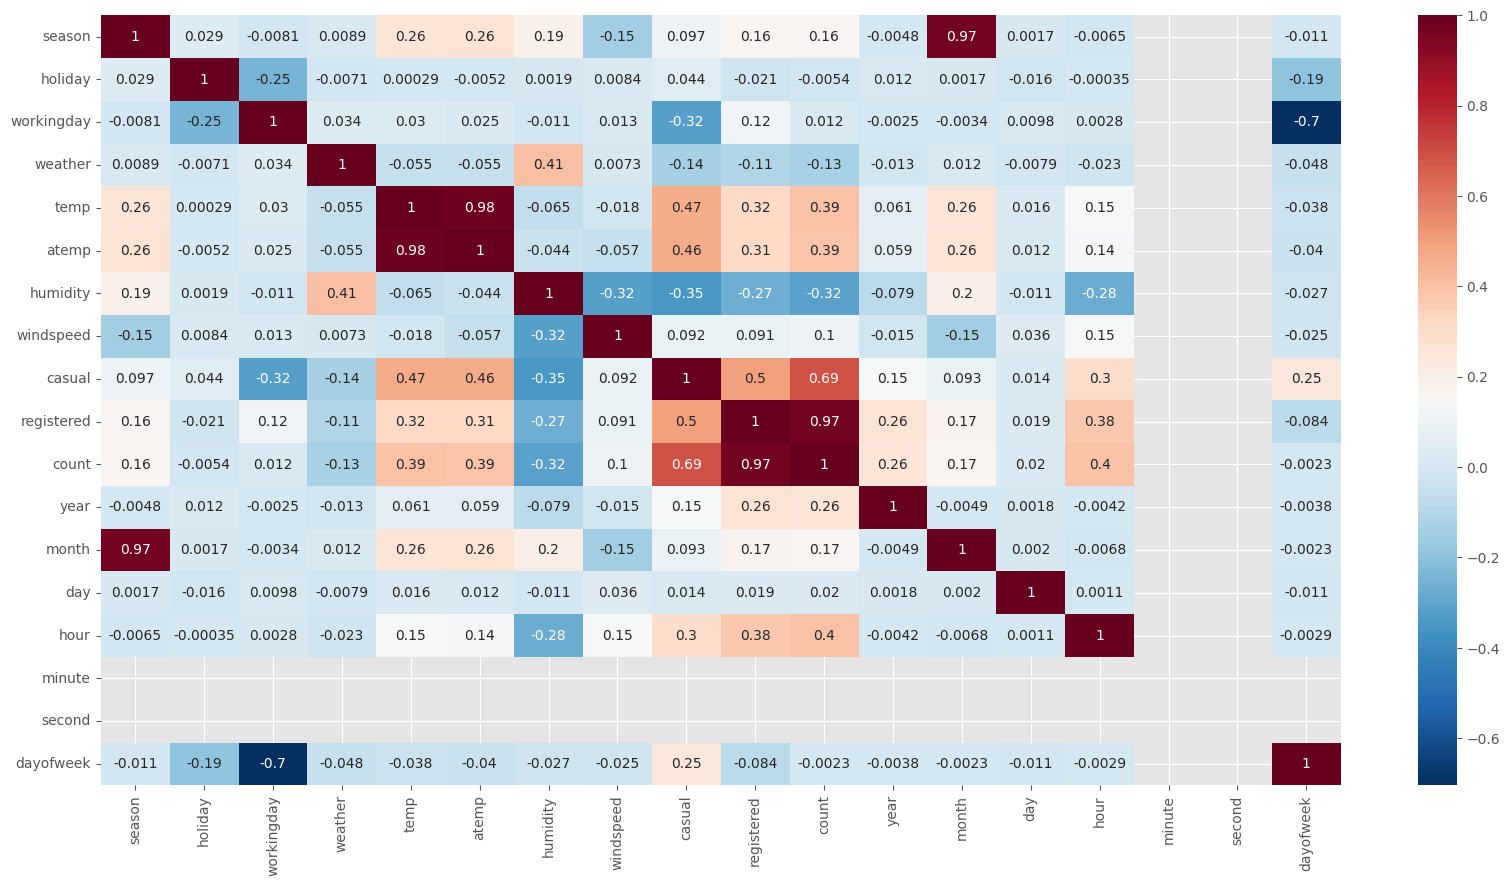

In [34]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(),annot=True,cmap="RdBu_r")

In [35]:
y=train["count"]
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [36]:
X=train.copy()
X.pop("count")
X.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  year  month  day  hour  minute  \
0        81        0.0       3          13  2011      1    1     0       0   
1        80        0.0       8          32  2011      1    1     1       0   
2        80        0.0       5          27  2011      1    1     2       0   
3        75        0.0       3          10  2011      1    1     3       0   
4        75        0.0       0           1  2011      1    1     4       0   

   second  dayofweek  
0       0          5  
1       0          5  
2       0          5  
3       0          5  
4       0          5

In [37]:
X.pop("datetime")

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [38]:
X.pop("registered")
X.pop("casual")
X.pop("day")
X.pop("minute")
X.pop("second")

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: second, Length: 10886, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_model=RandomForestRegressor(
    random_state=0
)

In [42]:
rf_model

RandomForestRegressor(random_state=0)

In [43]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [44]:
pred=rf_model.predict(X_test)

In [45]:
pred

array([ 33.95, 547.64,  89.25, ..., 318.19, 143.25, 330.48])

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
print("MSE:",mean_squared_error(y_test,pred))

MSE: 1508.207127363649


In [48]:
q1=np.percentile(train["count"],25)
q1

42.0

In [49]:
q3=np.percentile(train["count"],75)
q3

284.0

In [50]:
IQR=q3-q1
IQR

242.0

In [51]:
trainWithoutOutliers=train[(train["count"]>=q1-(1.5*IQR)) & (train["count"]<=(q3+1.5*IQR))]

In [52]:
trainWithoutOutliers

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.0000       3          13     16  2011      1   
1      13.635        80     0.0000       8          32     40  2011      1   
2      13.635        80     0.0000       5          27     32  2011      1   
3      14.395        75     0.0000       3          10     13  2011      1   
4      14.395        75     0.0000       0           1      1  2011      1   
...       ...       ...        ...     ...         ...    ...   ...    ...   
10881  19.695        50    26.0027       7         329    336  2012     12   
10882  17.425        57    15.0013      10         231    241  2012     12   
10883  15.910        61    15.0013       4         164    168  2012     12   
10884  17.425        61     6.0032      12         117    129  2012     12   
10885  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  minute  second  dayofweek  
0        1     0       0       0          5  
1        1     1       0       0          5  
2        1     2       0       0          5  
3        1     3       0       0          5  
4        1     4       0       0          5  
...    ...   ...     ...     ...        ...  
10881   19    19       0       0          2  
10882   19    20       0       0          2  
10883   19    21       0       0          2  
10884   19    22       0       0          2  
10885   19    23       0       0          2  

[10586 rows x 19 columns]

In [53]:
trainOutliers=train[(train["count"]<q1-(1.5*IQR)) | (train["count"]>(q3+1.5*IQR))]

In [54]:
trainOutliers

datetime  season  holiday  workingday  weather   temp  \
6611  2012-03-12 18:00:00       1        0           1        2  24.60   
6634  2012-03-13 17:00:00       1        0           1        1  28.70   
6635  2012-03-13 18:00:00       1        0           1        1  28.70   
6649  2012-03-14 08:00:00       1        0           1        1  18.04   
6658  2012-03-14 17:00:00       1        0           1        1  28.70   
...                   ...     ...      ...         ...      ...    ...   
10678 2012-12-11 08:00:00       4        0           1        2  13.94   
10702 2012-12-12 08:00:00       4        0           1        2  10.66   
10726 2012-12-13 08:00:00       4        0           1        1   9.84   
10846 2012-12-18 08:00:00       4        0           1        1  15.58   
10870 2012-12-19 08:00:00       4        0           1        1   9.84   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
6611   31.060        43    12.9980      89         623    712  2012      3   
6634   31.820        37     7.0015      62         614    676  2012      3   
6635   31.820        34    19.9995      96         638    734  2012      3   
6649   21.970        82     0.0000      34         628    662  2012      3   
6658   31.820        28     6.0032     140         642    782  2012      3   
...       ...       ...        ...     ...         ...    ...   ...    ...   
10678  15.150        61    19.9995      16         708    724  2012     12   
10702  12.880        65    11.0014      18         670    688  2012     12   
10726  11.365        60    12.9980      24         655    679  2012     12   
10846  19.695        94     0.0000      10         652    662  2012     12   
10870  12.880        87     7.0015      13         665    678  2012     12   

       day  hour  minute  second  dayofweek  
6611    12    18       0       0          0  
6634    13    17       0       0          1  
6635    13    18       0       0          1  
6649    14     8       0       0          2  
6658    14    17       0       0          2  
...    ...   ...     ...     ...        ...  
10678   11     8       0       0          1  
10702   12     8       0       0          2  
10726   13     8       0       0          3  
10846   18     8       0       0          1  
10870   19     8       0       0          2  

[300 rows x 19 columns]

In [56]:
train=trainWithoutOutliers.copy()

In [57]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.0000       3          13     16  2011      1   
1      13.635        80     0.0000       8          32     40  2011      1   
2      13.635        80     0.0000       5          27     32  2011      1   
3      14.395        75     0.0000       3          10     13  2011      1   
4      14.395        75     0.0000       0           1      1  2011      1   
...       ...       ...        ...     ...         ...    ...   ...    ...   
10881  19.695        50    26.0027       7         329    336  2012     12   
10882  17.425        57    15.0013      10         231    241  2012     12   
10883  15.910        61    15.0013       4         164    168  2012     12   
10884  17.425        61     6.0032      12         117    129  2012     12   
10885  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  minute  second  dayofweek  
0        1     0       0       0          5  
1        1     1       0       0          5  
2        1     2       0       0          5  
3        1     3       0       0          5  
4        1     4       0       0          5  
...    ...   ...     ...     ...        ...  
10881   19    19       0       0          2  
10882   19    20       0       0          2  
10883   19    21       0       0          2  
10884   19    22       0       0          2  
10885   19    23       0       0          2  

[10586 rows x 19 columns]

In [58]:
train.iloc[6610:6615, :]

datetime  season  holiday  workingday  weather   temp   atemp  \
6610 2012-03-12 17:00:00       1        0           1        2  25.42  31.060   
6612 2012-03-12 19:00:00       1        0           1        2  22.96  26.515   
6613 2012-03-12 20:00:00       1        0           1        2  22.96  26.515   
6614 2012-03-12 21:00:00       1        0           1        2  22.14  25.760   
6615 2012-03-12 22:00:00       1        0           1        2  22.96  26.515   

      humidity  windspeed  casual  registered  count  year  month  day  hour  \
6610        38    27.9993      87         557    644  2012      3   12    17   
6612        49    15.0013      67         379    446  2012      3   12    19   
6613        49    15.0013      49         237    286  2012      3   12    20   
6614        56    15.0013      22         183    205  2012      3   12    21   
6615        56    15.0013      17         116    133  2012      3   12    22   

      minute  second  dayofweek  
6610       0       0          0  
6612       0       0          0  
6613       0       0          0  
6614       0       0          0  
6615       0       0          0

In [59]:
train.index=range(len(train))

In [60]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.0000       3          13     16  2011      1   
1      13.635        80     0.0000       8          32     40  2011      1   
2      13.635        80     0.0000       5          27     32  2011      1   
3      14.395        75     0.0000       3          10     13  2011      1   
4      14.395        75     0.0000       0           1      1  2011      1   
...       ...       ...        ...     ...         ...    ...   ...    ...   
10581  19.695        50    26.0027       7         329    336  2012     12   
10582  17.425        57    15.0013      10         231    241  2012     12   
10583  15.910        61    15.0013       4         164    168  2012     12   
10584  17.425        61     6.0032      12         117    129  2012     12   
10585  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  minute  second  dayofweek  
0        1     0       0       0          5  
1        1     1       0       0          5  
2        1     2       0       0          5  
3        1     3       0       0          5  
4        1     4       0       0          5  
...    ...   ...     ...     ...        ...  
10581   19    19       0       0          2  
10582   19    20       0       0          2  
10583   19    21       0       0          2  
10584   19    22       0       0          2  
10585   19    23       0       0          2  

[10586 rows x 19 columns]

In [61]:
train.iloc[6610:6615, :]

datetime  season  holiday  workingday  weather   temp   atemp  \
6610 2012-03-12 17:00:00       1        0           1        2  25.42  31.060   
6611 2012-03-12 19:00:00       1        0           1        2  22.96  26.515   
6612 2012-03-12 20:00:00       1        0           1        2  22.96  26.515   
6613 2012-03-12 21:00:00       1        0           1        2  22.14  25.760   
6614 2012-03-12 22:00:00       1        0           1        2  22.96  26.515   

      humidity  windspeed  casual  registered  count  year  month  day  hour  \
6610        38    27.9993      87         557    644  2012      3   12    17   
6611        49    15.0013      67         379    446  2012      3   12    19   
6612        49    15.0013      49         237    286  2012      3   12    20   
6613        56    15.0013      22         183    205  2012      3   12    21   
6614        56    15.0013      17         116    133  2012      3   12    22   

      minute  second  dayofweek  
6610       0       0          0  
6611       0       0          0  
6612       0       0          0  
6613       0       0          0  
6614       0       0          0

In [62]:
plt.figure(figsize=(30,10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_5904\2811709529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"])


<Axes: xlabel='count', ylabel='Density'>

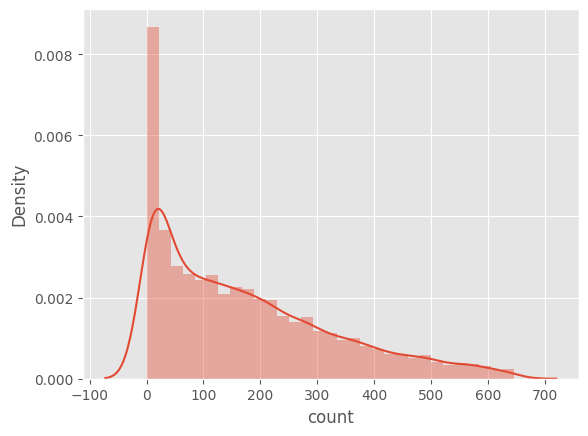

In [63]:
sns.distplot(train["count"])

In [64]:
train["count"]=np.log1p(train["count"])

In [65]:
plt.figure(figsize=(30,10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_5904\2811709529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"])


<Axes: xlabel='count', ylabel='Density'>

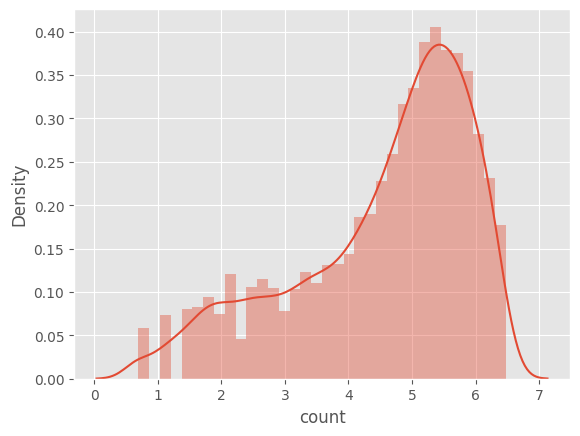

In [66]:
sns.distplot(train["count"])

In [67]:
y=train["count"]
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [69]:
X=train.copy()
X.pop("count")
X.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  year  month  day  hour  minute  \
0        81        0.0       3          13  2011      1    1     0       0   
1        80        0.0       8          32  2011      1    1     1       0   
2        80        0.0       5          27  2011      1    1     2       0   
3        75        0.0       3          10  2011      1    1     3       0   
4        75        0.0       0           1  2011      1    1     4       0   

   second  dayofweek  
0       0          5  
1       0          5  
2       0          5  
3       0          5  
4       0          5

In [70]:
X.pop("datetime")

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10581   2012-12-19 19:00:00
10582   2012-12-19 20:00:00
10583   2012-12-19 21:00:00
10584   2012-12-19 22:00:00
10585   2012-12-19 23:00:00
Name: datetime, Length: 10586, dtype: datetime64[ns]

In [71]:
X.pop("registered")
X.pop("casual")
X.pop("day")
X.pop("minute")
X.pop("second")

0        0
1        0
2        0
3        0
4        0
        ..
10581    0
10582    0
10583    0
10584    0
10585    0
Name: second, Length: 10586, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf_model=RandomForestRegressor(
    random_state=0
)

In [77]:
rf_model

RandomForestRegressor(random_state=0)

In [78]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [79]:
pred=rf_model.predict(X_test)

In [80]:
pred

array([5.21353958, 6.34629856, 5.01658599, ..., 4.62156498, 4.26557788,
       4.92001912])

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
print("MSE:",mean_squared_error(y_test,pred))

MSE: 0.09554298592599049


In [83]:
plt.figure(figsize=(10,20))

<Figure size 1000x2000 with 0 Axes>

<Figure size 1000x2000 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

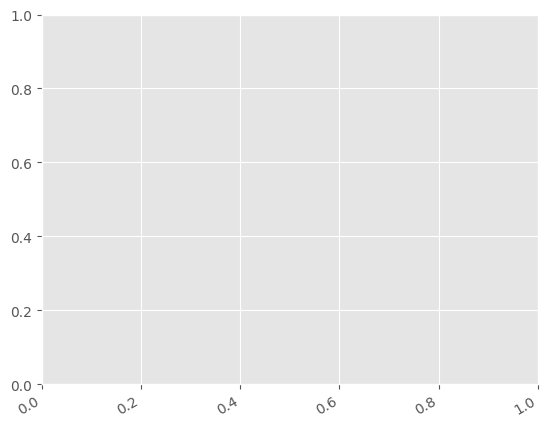

In [84]:
plt.xticks(rotation=30,ha='right')

<Axes: xlabel='windspeed', ylabel='count'>

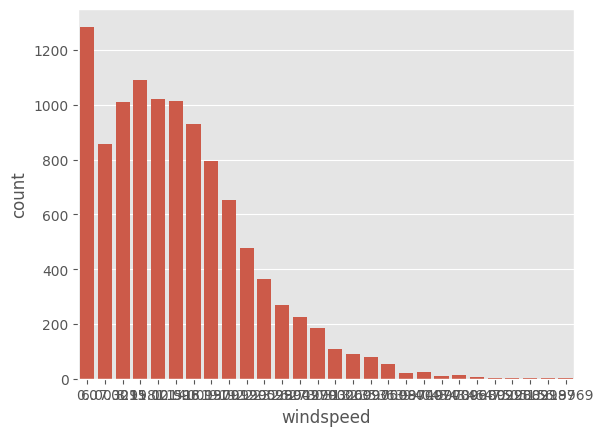

In [85]:
sns.countplot(data=train,x="windspeed")

In [86]:
trainWind0=train[train['windspeed']==0]

In [87]:
trainWind0

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10525 2012-12-17 09:00:00       4        0           1        2  16.40   
10528 2012-12-17 12:00:00       4        0           1        2  16.40   
10531 2012-12-17 15:00:00       4        0           1        2  17.22   
10561 2012-12-18 22:00:00       4        0           1        1  13.94   
10563 2012-12-19 00:00:00       4        0           1        1  12.30   

        atemp  humidity  windspeed  casual  registered     count  year  month  \
0      14.395        81        0.0       3          13  2.833213  2011      1   
1      13.635        80        0.0       8          32  3.713572  2011      1   
2      13.635        80        0.0       5          27  3.496508  2011      1   
3      14.395        75        0.0       3          10  2.639057  2011      1   
4      14.395        75        0.0       0           1  0.693147  2011      1   
...       ...       ...        ...     ...         ...       ...   ...    ...   
10525  20.455        87        0.0      11         271  5.645447  2012     12   
10528  20.455        87        0.0      21         211  5.451038  2012     12   
10531  21.210        88        0.0      15         196  5.356586  2012     12   
10561  16.665        49        0.0       5         127  4.890349  2012     12   
10563  15.910        61        0.0       6          35  3.737670  2012     12   

       day  hour  minute  second  dayofweek  
0        1     0       0       0          5  
1        1     1       0       0          5  
2        1     2       0       0          5  
3        1     3       0       0          5  
4        1     4       0       0          5  
...    ...   ...     ...     ...        ...  
10525   17     9       0       0          0  
10528   17    12       0       0          0  
10531   17    15       0       0          0  
10561   18    22       0       0          1  
10563   19     0       0       0          2  

[1285 rows x 19 columns]

In [88]:
trainWindNot0=train[train['windspeed']!=0]

In [89]:
trainWindNot0

datetime  season  holiday  workingday  weather   temp  \
5     2011-01-01 05:00:00       1        0           0        2   9.84   
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    2011-01-01 12:00:00       1        0           0        1  17.22   
13    2011-01-01 13:00:00       1        0           0        2  18.86   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered     count  year  month  \
5      12.880        75     6.0032       0           1  0.693147  2011      1   
10     19.695        76    16.9979      12          24  3.610918  2011      1   
11     16.665        81    19.0012      26          30  4.043051  2011      1   
12     21.210        77    19.0012      29          55  4.442651  2011      1   
13     22.725        72    19.9995      47          47  4.553877  2011      1   
...       ...       ...        ...     ...         ...       ...   ...    ...   
10581  19.695        50    26.0027       7         329  5.820083  2012     12   
10582  17.425        57    15.0013      10         231  5.488938  2012     12   
10583  15.910        61    15.0013       4         164  5.129899  2012     12   
10584  17.425        61     6.0032      12         117  4.867534  2012     12   
10585  16.665        66     8.9981       4          84  4.488636  2012     12   

       day  hour  minute  second  dayofweek  
5        1     5       0       0          5  
10       1    10       0       0          5  
11       1    11       0       0          5  
12       1    12       0       0          5  
13       1    13       0       0          5  
...    ...   ...     ...     ...        ...  
10581   19    19       0       0          2  
10582   19    20       0       0          2  
10583   19    21       0       0          2  
10584   19    22       0       0          2  
10585   19    23       0       0          2  

[9301 rows x 19 columns]

In [90]:
trainWindNot0['windspeed'].mean()

14.541892215890764

In [91]:
X=train.copy()

In [92]:
X[X['windspeed']==0]

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10525 2012-12-17 09:00:00       4        0           1        2  16.40   
10528 2012-12-17 12:00:00       4        0           1        2  16.40   
10531 2012-12-17 15:00:00       4        0           1        2  17.22   
10561 2012-12-18 22:00:00       4        0           1        1  13.94   
10563 2012-12-19 00:00:00       4        0           1        1  12.30   

        atemp  humidity  windspeed  casual  registered     count  year  month  \
0      14.395        81        0.0       3          13  2.833213  2011      1   
1      13.635        80        0.0       8          32  3.713572  2011      1   
2      13.635        80        0.0       5          27  3.496508  2011      1   
3      14.395        75        0.0       3          10  2.639057  2011      1   
4      14.395        75        0.0       0           1  0.693147  2011      1   
...       ...       ...        ...     ...         ...       ...   ...    ...   
10525  20.455        87        0.0      11         271  5.645447  2012     12   
10528  20.455        87        0.0      21         211  5.451038  2012     12   
10531  21.210        88        0.0      15         196  5.356586  2012     12   
10561  16.665        49        0.0       5         127  4.890349  2012     12   
10563  15.910        61        0.0       6          35  3.737670  2012     12   

       day  hour  minute  second  dayofweek  
0        1     0       0       0          5  
1        1     1       0       0          5  
2        1     2       0       0          5  
3        1     3       0       0          5  
4        1     4       0       0          5  
...    ...   ...     ...     ...        ...  
10525   17     9       0       0          0  
10528   17    12       0       0          0  
10531   17    15       0       0          0  
10561   18    22       0       0          1  
10563   19     0       0       0          2  

[1285 rows x 19 columns]

In [93]:
X.loc[X['windspeed']==0,"windspeed"]=trainWindNot0['windspeed'].mean()

In [94]:
X

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered     count  year  month  \
0      14.395        81  14.541892       3          13  2.833213  2011      1   
1      13.635        80  14.541892       8          32  3.713572  2011      1   
2      13.635        80  14.541892       5          27  3.496508  2011      1   
3      14.395        75  14.541892       3          10  2.639057  2011      1   
4      14.395        75  14.541892       0           1  0.693147  2011      1   
...       ...       ...        ...     ...         ...       ...   ...    ...   
10581  19.695        50  26.002700       7         329  5.820083  2012     12   
10582  17.425        57  15.001300      10         231  5.488938  2012     12   
10583  15.910        61  15.001300       4         164  5.129899  2012     12   
10584  17.425        61   6.003200      12         117  4.867534  2012     12   
10585  16.665        66   8.998100       4          84  4.488636  2012     12   

       day  hour  minute  second  dayofweek  
0        1     0       0       0          5  
1        1     1       0       0          5  
2        1     2       0       0          5  
3        1     3       0       0          5  
4        1     4       0       0          5  
...    ...   ...     ...     ...        ...  
10581   19    19       0       0          2  
10582   19    20       0       0          2  
10583   19    21       0       0          2  
10584   19    22       0       0          2  
10585   19    23       0       0          2  

[10586 rows x 19 columns]

In [95]:
trainWindNot0['windspeed'].mean()

14.541892215890764

In [96]:
train["peak"]=0

In [97]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered     count  year  month  \
0      14.395        81     0.0000       3          13  2.833213  2011      1   
1      13.635        80     0.0000       8          32  3.713572  2011      1   
2      13.635        80     0.0000       5          27  3.496508  2011      1   
3      14.395        75     0.0000       3          10  2.639057  2011      1   
4      14.395        75     0.0000       0           1  0.693147  2011      1   
...       ...       ...        ...     ...         ...       ...   ...    ...   
10581  19.695        50    26.0027       7         329  5.820083  2012     12   
10582  17.425        57    15.0013      10         231  5.488938  2012     12   
10583  15.910        61    15.0013       4         164  5.129899  2012     12   
10584  17.425        61     6.0032      12         117  4.867534  2012     12   
10585  16.665        66     8.9981       4          84  4.488636  2012     12   

       day  hour  minute  second  dayofweek  peak  
0        1     0       0       0          5     0  
1        1     1       0       0          5     0  
2        1     2       0       0          5     0  
3        1     3       0       0          5     0  
4        1     4       0       0          5     0  
...    ...   ...     ...     ...        ...   ...  
10581   19    19       0       0          2     0  
10582   19    20       0       0          2     0  
10583   19    21       0       0          2     0  
10584   19    22       0       0          2     0  
10585   19    23       0       0          2     0  

[10586 rows x 20 columns]

In [98]:
for index in range(len(train)):
    workingday=train.loc[index,"workingday"]
    hour=train.loc[index,"hour"]
    print("index:",index)
    print("workingday:",workingday)
    print("hour:",hour)
    print("="*100)
    if workingday==1:
        if hour==8 or (17<=hour<=18):
            train.loc[index,"peak"]=1
    else:
        if 10<=hour<=19:
            train.loc[index,"peak"]=1

index: 0
workingday: 0
hour: 0
index: 1
workingday: 0
hour: 1
index: 2
workingday: 0
hour: 2
index: 3
workingday: 0
hour: 3
index: 4
workingday: 0
hour: 4
index: 5
workingday: 0
hour: 5
index: 6
workingday: 0
hour: 6
index: 7
workingday: 0
hour: 7
index: 8
workingday: 0
hour: 8
index: 9
workingday: 0
hour: 9
index: 10
workingday: 0
hour: 10
index: 11
workingday: 0
hour: 11
index: 12
workingday: 0
hour: 12
index: 13
workingday: 0
hour: 13
index: 14
workingday: 0
hour: 14
index: 15
workingday: 0
hour: 15
index: 16
workingday: 0
hour: 16
index: 17
workingday: 0
hour: 17
index: 18
workingday: 0
hour: 18
index: 19
workingday: 0
hour: 19
index: 20
workingday: 0
hour: 20
index: 21
workingday: 0
hour: 21
index: 22
workingday: 0
hour: 22
index: 23
workingday: 0
hour: 23
index: 24
workingday: 0
hour: 0
index: 25
workingday: 0
hour: 1
index: 26
workingday: 0
hour: 2
index: 27
workingday: 0
hour: 3
index: 28
workingday: 0
hour: 4
index: 29
workingday: 0
hour: 6
index: 30
workingday: 0
hour: 7
inde

In [99]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered     count  year  month  \
0      14.395        81     0.0000       3          13  2.833213  2011      1   
1      13.635        80     0.0000       8          32  3.713572  2011      1   
2      13.635        80     0.0000       5          27  3.496508  2011      1   
3      14.395        75     0.0000       3          10  2.639057  2011      1   
4      14.395        75     0.0000       0           1  0.693147  2011      1   
...       ...       ...        ...     ...         ...       ...   ...    ...   
10581  19.695        50    26.0027       7         329  5.820083  2012     12   
10582  17.425        57    15.0013      10         231  5.488938  2012     12   
10583  15.910        61    15.0013       4         164  5.129899  2012     12   
10584  17.425        61     6.0032      12         117  4.867534  2012     12   
10585  16.665        66     8.9981       4          84  4.488636  2012     12   

       day  hour  minute  second  dayofweek  peak  
0        1     0       0       0          5     0  
1        1     1       0       0          5     0  
2        1     2       0       0          5     0  
3        1     3       0       0          5     0  
4        1     4       0       0          5     0  
...    ...   ...     ...     ...        ...   ...  
10581   19    19       0       0          2     0  
10582   19    20       0       0          2     0  
10583   19    21       0       0          2     0  
10584   19    22       0       0          2     0  
10585   19    23       0       0          2     0  

[10586 rows x 20 columns]

In [100]:
train[train["peak"]==1]

datetime  season  holiday  workingday  weather   temp  \
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    2011-01-01 12:00:00       1        0           0        1  17.22   
13    2011-01-01 13:00:00       1        0           0        2  18.86   
14    2011-01-01 14:00:00       1        0           0        2  18.86   
...                   ...     ...      ...         ...      ...    ...   
10534 2012-12-17 18:00:00       4        0           1        2  16.40   
10556 2012-12-18 17:00:00       4        0           1        1  16.40   
10557 2012-12-18 18:00:00       4        0           1        1  15.58   
10579 2012-12-19 17:00:00       4        0           1        1  16.40   
10580 2012-12-19 18:00:00       4        0           1        1  15.58   

        atemp  humidity  windspeed  casual  registered     count  year  month  \
10     19.695        76    16.9979      12          24  3.610918  2011      1   
11     16.665        81    19.0012      26          30  4.043051  2011      1   
12     21.210        77    19.0012      29          55  4.442651  2011      1   
13     22.725        72    19.9995      47          47  4.553877  2011      1   
14     22.725        72    19.0012      35          71  4.672829  2011      1   
...       ...       ...        ...     ...         ...       ...   ...    ...   
10534  20.455        94     6.0032      14         493  6.230481  2012     12   
10556  20.455        47    30.0026      39         533  6.350886  2012     12   
10557  19.695        46    22.0028      13         512  6.265301  2012     12   
10579  20.455        50    26.0027      26         536  6.333280  2012     12   
10580  19.695        50    23.9994      23         546  6.345636  2012     12   

       day  hour  minute  second  dayofweek  peak  
10       1    10       0       0          5     1  
11       1    11       0       0          5     1  
12       1    12       0       0          5     1  
13       1    13       0       0          5     1  
14       1    14       0       0          5     1  
...    ...   ...     ...     ...        ...   ...  
10534   17    18       0       0          0     1  
10556   18    17       0       0          1     1  
10557   18    18       0       0          1     1  
10579   19    17       0       0          2     1  
10580   19    18       0       0          2     1  

[2090 rows x 20 columns]

In [101]:
train["ideal"]=0

In [102]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  ...     count  year  month  day  \
0      14.395        81     0.0000       3  ...  2.833213  2011      1    1   
1      13.635        80     0.0000       8  ...  3.713572  2011      1    1   
2      13.635        80     0.0000       5  ...  3.496508  2011      1    1   
3      14.395        75     0.0000       3  ...  2.639057  2011      1    1   
4      14.395        75     0.0000       0  ...  0.693147  2011      1    1   
...       ...       ...        ...     ...  ...       ...   ...    ...  ...   
10581  19.695        50    26.0027       7  ...  5.820083  2012     12   19   
10582  17.425        57    15.0013      10  ...  5.488938  2012     12   19   
10583  15.910        61    15.0013       4  ...  5.129899  2012     12   19   
10584  17.425        61     6.0032      12  ...  4.867534  2012     12   19   
10585  16.665        66     8.9981       4  ...  4.488636  2012     12   19   

       hour  minute  second  dayofweek  peak  ideal  
0         0       0       0          5     0      0  
1         1       0       0          5     0      0  
2         2       0       0          5     0      0  
3         3       0       0          5     0      0  
4         4       0       0          5     0      0  
...     ...     ...     ...        ...   ...    ...  
10581    19       0       0          2     0      0  
10582    20       0       0          2     0      0  
10583    21       0       0          2     0      0  
10584    22       0       0          2     0      0  
10585    23       0       0          2     0      0  

[10586 rows x 21 columns]

In [103]:
for index in range(len(train)):
    if (train.loc[index,"temp"]>27) & (train.loc[index,"windspeed"]<30):
        train.loc[index,"ideal"]=1

In [104]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  ...     count  year  month  day  \
0      14.395        81     0.0000       3  ...  2.833213  2011      1    1   
1      13.635        80     0.0000       8  ...  3.713572  2011      1    1   
2      13.635        80     0.0000       5  ...  3.496508  2011      1    1   
3      14.395        75     0.0000       3  ...  2.639057  2011      1    1   
4      14.395        75     0.0000       0  ...  0.693147  2011      1    1   
...       ...       ...        ...     ...  ...       ...   ...    ...  ...   
10581  19.695        50    26.0027       7  ...  5.820083  2012     12   19   
10582  17.425        57    15.0013      10  ...  5.488938  2012     12   19   
10583  15.910        61    15.0013       4  ...  5.129899  2012     12   19   
10584  17.425        61     6.0032      12  ...  4.867534  2012     12   19   
10585  16.665        66     8.9981       4  ...  4.488636  2012     12   19   

       hour  minute  second  dayofweek  peak  ideal  
0         0       0       0          5     0      0  
1         1       0       0          5     0      0  
2         2       0       0          5     0      0  
3         3       0       0          5     0      0  
4         4       0       0          5     0      0  
...     ...     ...     ...        ...   ...    ...  
10581    19       0       0          2     0      0  
10582    20       0       0          2     0      0  
10583    21       0       0          2     0      0  
10584    22       0       0          2     0      0  
10585    23       0       0          2     0      0  

[10586 rows x 21 columns]

In [106]:
train[train["ideal"]==1]

datetime  season  holiday  workingday  weather   temp   atemp  \
843  2011-02-18 14:00:00       1        0           1        1  27.06  31.060   
844  2011-02-18 15:00:00       1        0           1        1  27.06  31.060   
845  2011-02-18 16:00:00       1        0           1        1  27.06  31.060   
846  2011-02-18 17:00:00       1        0           1        1  27.06  31.060   
1289 2011-03-18 14:00:00       1        0           1        1  27.06  31.060   
...                  ...     ...      ...         ...      ...    ...     ...   
9388 2012-10-05 15:00:00       4        0           1        1  29.52  32.575   
9389 2012-10-05 16:00:00       4        0           1        1  29.52  32.575   
9585 2012-10-14 14:00:00       4        0           0        1  27.06  31.060   
9586 2012-10-14 15:00:00       4        0           0        1  27.06  31.060   
9694 2012-10-19 14:00:00       4        0           1        1  27.06  31.060   

      humidity  windspeed  casual  ...     count  year  month  day  hour  \
843         36    19.9995      73  ...  5.257495  2011      2   18    14   
844         36    22.0028      55  ...  5.153292  2011      2   18    15   
845         36    19.0012      68  ...  5.451038  2011      2   18    16   
846         34    23.9994      52  ...  5.793014  2011      2   18    17   
1289        39    16.9979      71  ...  5.164786  2011      3   18    14   
...        ...        ...     ...  ...       ...   ...    ...  ...   ...   
9388        39    16.9979     150  ...  6.154858  2012     10    5    15   
9389        37     0.0000     153  ...  6.453625  2012     10    5    16   
9585        39    27.9993     249  ...  6.426488  2012     10   14    14   
9586        39    27.9993     213  ...  6.343880  2012     10   14    15   
9694        61    16.9979      88  ...  5.902633  2012     10   19    14   

      minute  second  dayofweek  peak  ideal  
843        0       0          4     0      1  
844        0       0          4     0      1  
845        0       0          4     0      1  
846        0       0          4     1      1  
1289       0       0          4     0      1  
...      ...     ...        ...   ...    ...  
9388       0       0          4     0      1  
9389       0       0          4     0      1  
9585       0       0          6     1      1  
9586       0       0          6     1      1  
9694       0       0          4     0      1  

[2423 rows x 21 columns]

In [107]:
train["sticky"]=0

In [108]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  ...  year  month  day  hour  \
0      14.395        81     0.0000       3  ...  2011      1    1     0   
1      13.635        80     0.0000       8  ...  2011      1    1     1   
2      13.635        80     0.0000       5  ...  2011      1    1     2   
3      14.395        75     0.0000       3  ...  2011      1    1     3   
4      14.395        75     0.0000       0  ...  2011      1    1     4   
...       ...       ...        ...     ...  ...   ...    ...  ...   ...   
10581  19.695        50    26.0027       7  ...  2012     12   19    19   
10582  17.425        57    15.0013      10  ...  2012     12   19    20   
10583  15.910        61    15.0013       4  ...  2012     12   19    21   
10584  17.425        61     6.0032      12  ...  2012     12   19    22   
10585  16.665        66     8.9981       4  ...  2012     12   19    23   

       minute  second  dayofweek  peak  ideal  sticky  
0           0       0          5     0      0       0  
1           0       0          5     0      0       0  
2           0       0          5     0      0       0  
3           0       0          5     0      0       0  
4           0       0          5     0      0       0  
...       ...     ...        ...   ...    ...     ...  
10581       0       0          2     0      0       0  
10582       0       0          2     0      0       0  
10583       0       0          2     0      0       0  
10584       0       0          2     0      0       0  
10585       0       0          2     0      0       0  

[10586 rows x 22 columns]

In [110]:
for index in range(len(train)):
    if (train.loc[index,"humidity"]>=60) & (train.loc[index,"workingday"]==1):
        train.loc[index,"sticky"]=1

In [111]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  ...  year  month  day  hour  \
0      14.395        81     0.0000       3  ...  2011      1    1     0   
1      13.635        80     0.0000       8  ...  2011      1    1     1   
2      13.635        80     0.0000       5  ...  2011      1    1     2   
3      14.395        75     0.0000       3  ...  2011      1    1     3   
4      14.395        75     0.0000       0  ...  2011      1    1     4   
...       ...       ...        ...     ...  ...   ...    ...  ...   ...   
10581  19.695        50    26.0027       7  ...  2012     12   19    19   
10582  17.425        57    15.0013      10  ...  2012     12   19    20   
10583  15.910        61    15.0013       4  ...  2012     12   19    21   
10584  17.425        61     6.0032      12  ...  2012     12   19    22   
10585  16.665        66     8.9981       4  ...  2012     12   19    23   

       minute  second  dayofweek  peak  ideal  sticky  
0           0       0          5     0      0       0  
1           0       0          5     0      0       0  
2           0       0          5     0      0       0  
3           0       0          5     0      0       0  
4           0       0          5     0      0       0  
...       ...     ...        ...   ...    ...     ...  
10581       0       0          2     0      0       0  
10582       0       0          2     0      0       0  
10583       0       0          2     0      0       1  
10584       0       0          2     0      0       1  
10585       0       0          2     0      0       1  

[10586 rows x 22 columns]

In [112]:
train[train['sticky']==1]

datetime  season  holiday  workingday  weather   temp  \
66    2011-01-03 21:00:00       1        0           1        1   7.38   
67    2011-01-03 22:00:00       1        0           1        1   5.74   
71    2011-01-04 02:00:00       1        0           1        1   5.74   
72    2011-01-04 04:00:00       1        0           1        1   5.74   
73    2011-01-04 05:00:00       1        0           1        1   4.92   
...                   ...     ...      ...         ...      ...    ...   
10571 2012-12-19 09:00:00       4        0           1        1  11.48   
10572 2012-12-19 10:00:00       4        0           1        1  13.12   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  ...  year  month  day  hour  \
66      9.850        64     8.9981       3  ...  2011      1    3    21   
67      7.575        69     8.9981       0  ...  2011      1    3    22   
71      7.575        63     8.9981       0  ...  2011      1    4     2   
72      9.090        63     6.0032       0  ...  2011      1    4     4   
73      7.575        68     7.0015       0  ...  2011      1    4     5   
...       ...       ...        ...     ...  ...   ...    ...  ...   ...   
10571  14.395        75     7.0015       8  ...  2012     12   19     9   
10572  16.665        70     7.0015      17  ...  2012     12   19    10   
10583  15.910        61    15.0013       4  ...  2012     12   19    21   
10584  17.425        61     6.0032      12  ...  2012     12   19    22   
10585  16.665        66     8.9981       4  ...  2012     12   19    23   

       minute  second  dayofweek  peak  ideal  sticky  
66          0       0          0     0      0       1  
67          0       0          0     0      0       1  
71          0       0          1     0      0       1  
72          0       0          1     0      0       1  
73          0       0          1     0      0       1  
...       ...     ...        ...   ...    ...     ...  
10571       0       0          2     0      0       1  
10572       0       0          2     0      0       1  
10583       0       0          2     0      0       1  
10584       0       0          2     0      0       1  
10585       0       0          2     0      0       1  

[3836 rows x 22 columns]

In [113]:
y=train["count"]
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [114]:
X=train.copy()
X.pop("count")

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [115]:
X

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10581 2012-12-19 19:00:00       4        0           1        1  15.58   
10582 2012-12-19 20:00:00       4        0           1        1  14.76   
10583 2012-12-19 21:00:00       4        0           1        1  13.94   
10584 2012-12-19 22:00:00       4        0           1        1  13.94   
10585 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  ...  year  month  day  hour  \
0      14.395        81     0.0000       3  ...  2011      1    1     0   
1      13.635        80     0.0000       8  ...  2011      1    1     1   
2      13.635        80     0.0000       5  ...  2011      1    1     2   
3      14.395        75     0.0000       3  ...  2011      1    1     3   
4      14.395        75     0.0000       0  ...  2011      1    1     4   
...       ...       ...        ...     ...  ...   ...    ...  ...   ...   
10581  19.695        50    26.0027       7  ...  2012     12   19    19   
10582  17.425        57    15.0013      10  ...  2012     12   19    20   
10583  15.910        61    15.0013       4  ...  2012     12   19    21   
10584  17.425        61     6.0032      12  ...  2012     12   19    22   
10585  16.665        66     8.9981       4  ...  2012     12   19    23   

       minute  second  dayofweek  peak  ideal  sticky  
0           0       0          5     0      0       0  
1           0       0          5     0      0       0  
2           0       0          5     0      0       0  
3           0       0          5     0      0       0  
4           0       0          5     0      0       0  
...       ...     ...        ...   ...    ...     ...  
10581       0       0          2     0      0       0  
10582       0       0          2     0      0       0  
10583       0       0          2     0      0       1  
10584       0       0          2     0      0       1  
10585       0       0          2     0      0       1  

[10586 rows x 21 columns]

In [116]:
X.pop("datetime")

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10581   2012-12-19 19:00:00
10582   2012-12-19 20:00:00
10583   2012-12-19 21:00:00
10584   2012-12-19 22:00:00
10585   2012-12-19 23:00:00
Name: datetime, Length: 10586, dtype: datetime64[ns]

In [117]:
X.pop("registered")
X.pop("casual")
X.pop("day")
X.pop("minute")
X.pop("second")

0        0
1        0
2        0
3        0
4        0
        ..
10581    0
10582    0
10583    0
10584    0
10585    0
Name: second, Length: 10586, dtype: int64

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [119]:
rf_model=RandomForestRegressor(
    random_state=0
)

In [120]:
rf_model

RandomForestRegressor(random_state=0)

In [121]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [122]:
pred=rf_model.predict(X_test)

In [123]:
pred

array([5.47033661, 6.3670128 , 4.8955457 , ..., 4.59603958, 4.26801692,
       4.92322471])

In [124]:
print("MSE:",mean_squared_error(y_test,pred))

MSE: 0.09099744644918176


In [125]:
rf_model.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=209652396)

In [127]:
from sklearn import tree

In [128]:
dt_dot_data=tree.export_graphviz(
    rf_model.estimators_[0],
    feature_names=X.columns,
    special_characters=True,
    filled=True,
    rounded=True
)

In [129]:
dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<hour &le; 6.5<br/>squared_error = 1.977<br/>samples = 5338<br/>value = 4.54>, fillcolor="#eeab7b"] ;\n1 [label=<hour &le; 5.5<br/>squared_error = 1.337<br/>samples = 1577<br/>value = 2.871>, fillcolor="#f5d0b4"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<hour &le; 1.5<br/>squared_error = 1.128<br/>samples = 1337<br/>value = 2.682>, fillcolor="#f6d4bb"] ;\n1 -> 2 ;\n3 [label=<dayofweek &le; 4.5<br/>squared_error = 0.852<br/>samples = 437<br/>value = 3.371>, fillcolor="#f3c5a3"] ;\n2 -> 3 ;\n4 [label=<hour &le; 0.5<br/>squared_error = 0.593<br/>samples = 319<br/>value = 3.024>, fillcolor="#f5ccaf"] ;\n3 -> 4 ;\n5 [label=<season &le; 1.5<br/>squared_error = 0.456<br/>samples = 158<br/>value = 3.398>, fillcolor="#f3c4a2"] ;\n4 -> 5 ;\n6 [label=<year &le; 2011.5<br/>squared_error = 0.382<br/>samples = 40<br/>value = 2.67

In [131]:
import pydotplus

In [132]:
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)

In [133]:
dt_graph

In [134]:
dt_graph.write_pdf("bike01.pdf")

True